# Main text

## Fig 1(b)

In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from qubitPack.tool_box import get_db


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

FONT_STYLE = "Times New Roman"

In [1007]:
def get_defect_state(defect_taskid, host_taskid, defect_col, host_col, vbm_dx=-0.05, cbm_dx=0):
    from qubitPack.qc_searching.analysis.main import get_defect_state
    from qubitPack.tool_box import get_db

    from pymatgen import Structure
    import os

    defect_db = get_db("single_photon_emitter", defect_col, port=1234)
    host_db = get_db("single_photon_emitter", host_col, port=1234)


    tk_id = defect_taskid

    # pc_from_id = defect_db.collection.find_one({"task_id": tk_id})["pc_from"]
    # c2db_uid = host_db.collection.find_one({"task_id": pc_from_id})["c2db_info"]["uid"]

    tot, proj, d_df, levels = get_defect_state(
        defect_db,
        {"task_id": defect_taskid},
        -6.5, -3.5,
        None,
        False,
        "proj",
        (host_db, host_taskid, 0, vbm_dx, cbm_dx),
        #(get_db("antisiteQubit", "W_S_Ef"), 312, 0.), 591, 593:WS2, 592, 594:WSe2 630:WTe2, 611, :MoS2, 610,
        # :MoSe2,
        # 631:MoTe2
        0.01,
        locpot_c2db=None, #(c2db, c2db_uid, 0)
        is_vacuum_aligment_on_plot=True
    )
    return levels

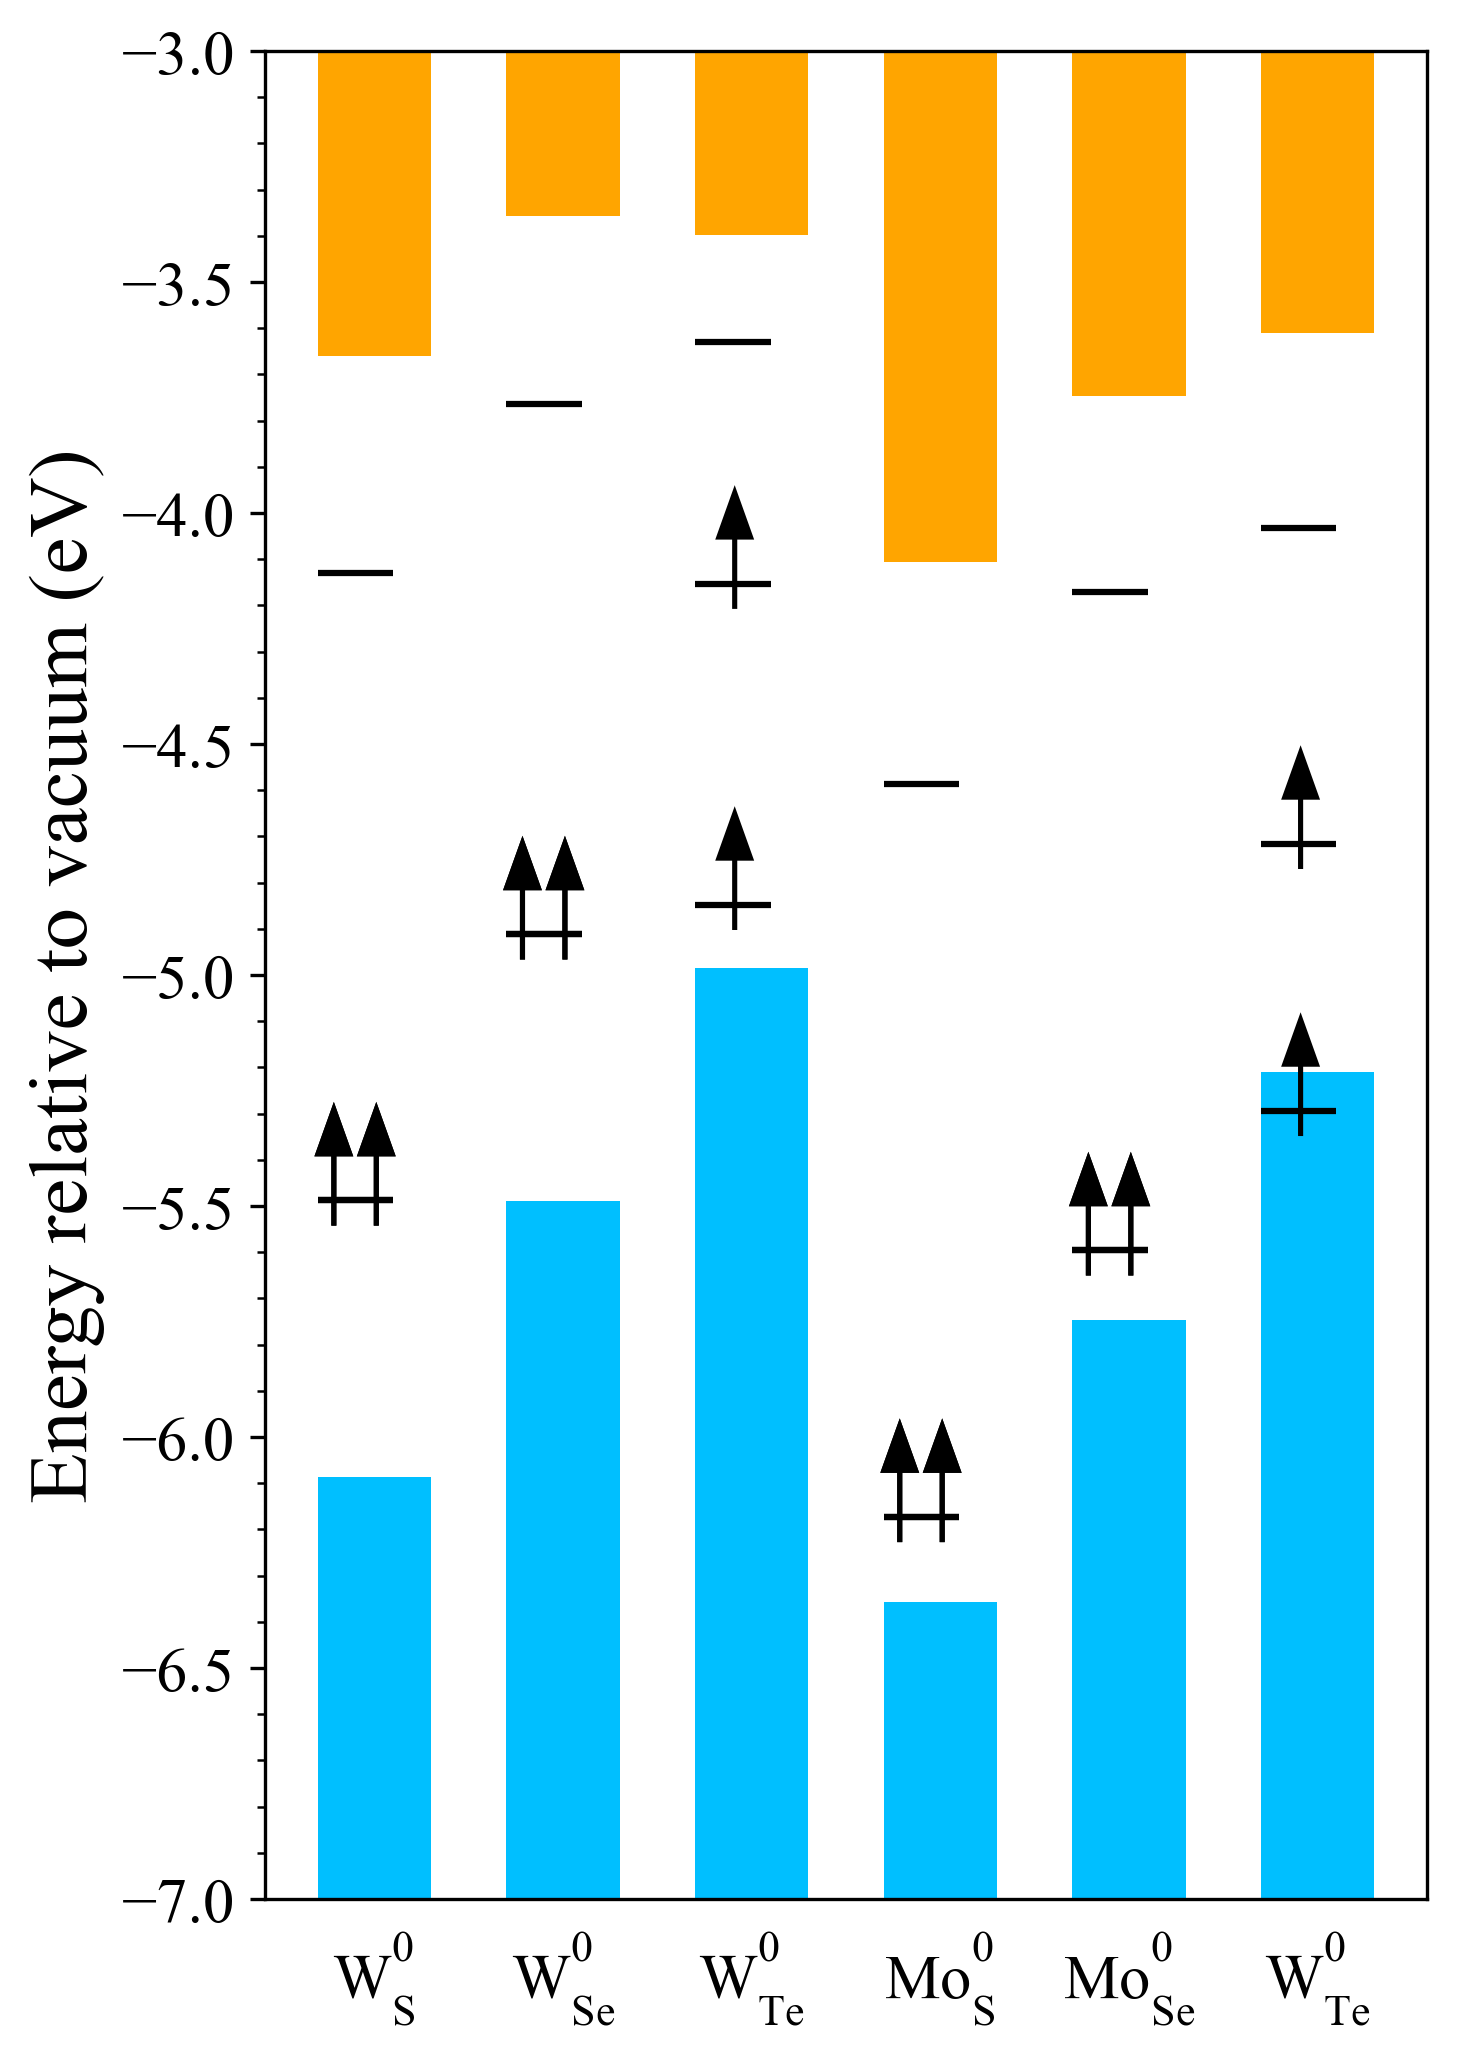

In [911]:
ws2 = {"cbm": -3.661, "vbm": -6.086, "e0": -5.488, "e1": -5.488, "e2": -4.129, "label": r"$\mathdefault{W_S^0}$"}
wse2 = {"cbm": -3.357, "vbm": -5.49, "e0": -4.912, "e1": -4.912, "e2": -3.765, "label": r"$\mathdefault{W_{Se}^0}$"}
wte2 = {"cbm": -3.399, "vbm": -4.984, "e0": -4.848, "e1": -4.153, "e2": -3.629, "label": r"$\mathdefault{W_{Te}^0}$"}


mos2 = {"cbm": -4.105, "vbm": -6.358, "e0": -6.173, "e1": -6.173, "e2": -4.587, "label": r"$\mathdefault{Mo_S^0}$"}
mose2 = {"cbm": -3.746, "vbm": -5.746, "e0": -5.596, "e1": -5.596, "e2": -4.17, "label": r"$\mathdefault{Mo_{Se}^0}$"}
mote2 = {"cbm": -3.611, "vbm": -5.21, "e0": -5.294, "e1": -4.716, "e2": -4.033, "label": r"$\mathdefault{W_{Te}^0}$"}



fig, ax = plt.subplots(figsize=(5,8), dpi=300)
for defect, x in zip([ws2, wse2, wte2, mos2, mose2, mote2], range(0, 12, 2)):
    cbm, vbm, e0, e1, e2, label = tuple(defect.values())
    for edge in [cbm, vbm]:
        ax.bar(x, vbm--7, 1.2, -7, color="deepskyblue")
        ax.bar(x, -3-cbm, 1.2, cbm, color="orange")
    dx = -0.1
            
    for level in [e2]:
        ax.hlines(level, x+dx-0.5, x+dx+0.3, colors="black")

    if "Te" in defect["label"]:
        for level in [e0, e1]:
            # dx += 0.2
            ax.hlines(level, x+dx-0.5, x+dx+0.3, colors="black")
            ax.arrow(x-0.58-0.52-0.06+0.98, level-0.05, dx=0, dy=0.15,
                     head_length=0.1, width=0.01, head_width=0.35, shape="full", color="black")

    else:
        for level in [e0, e1]:
            # dx += 0.2
            ax.hlines(level, x+dx-0.5, x+dx+0.3, colors="black")
            ax.arrow(x-0.58-0.52-0.31+0.98, level-0.05, dx=0, dy=0.15,
                     head_length=0.1, width=0.01, head_width=0.35, shape="full", color="black")
            ax.arrow(x-0.38-0.27-0.31+0.98, level-0.05, dx=0, dy=0.15,
                     head_length=0.1, width=0.01, head_width=0.35, shape="full", color="black")





ax.set_ylim(-7, -3)

ax.set_xticks(range(0, 12, 2))
ax.set_xticklabels([i["label"] for i in [ws2, wse2, wte2, mos2, mose2, mote2]], fontdict={"fontname": FONT_STYLE, 
                                                                             "fontsize":15})
ax.tick_params(axis="x", bottom=False)


for tick in ax.get_yticklabels():
    tick.set_fontsize(15)



ax.set_ylabel("Energy relative to vacuum (eV)", fontname=FONT_STYLE, fontsize=20)

#     plt.xlim(-0.5, 0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
display(fig)

## FIG 1(d)

591
625
630
611
610
631
     bandgap
591   2.4245
610   2.0003
611   2.2524
625   2.1333
630   1.5859
631   1.5993


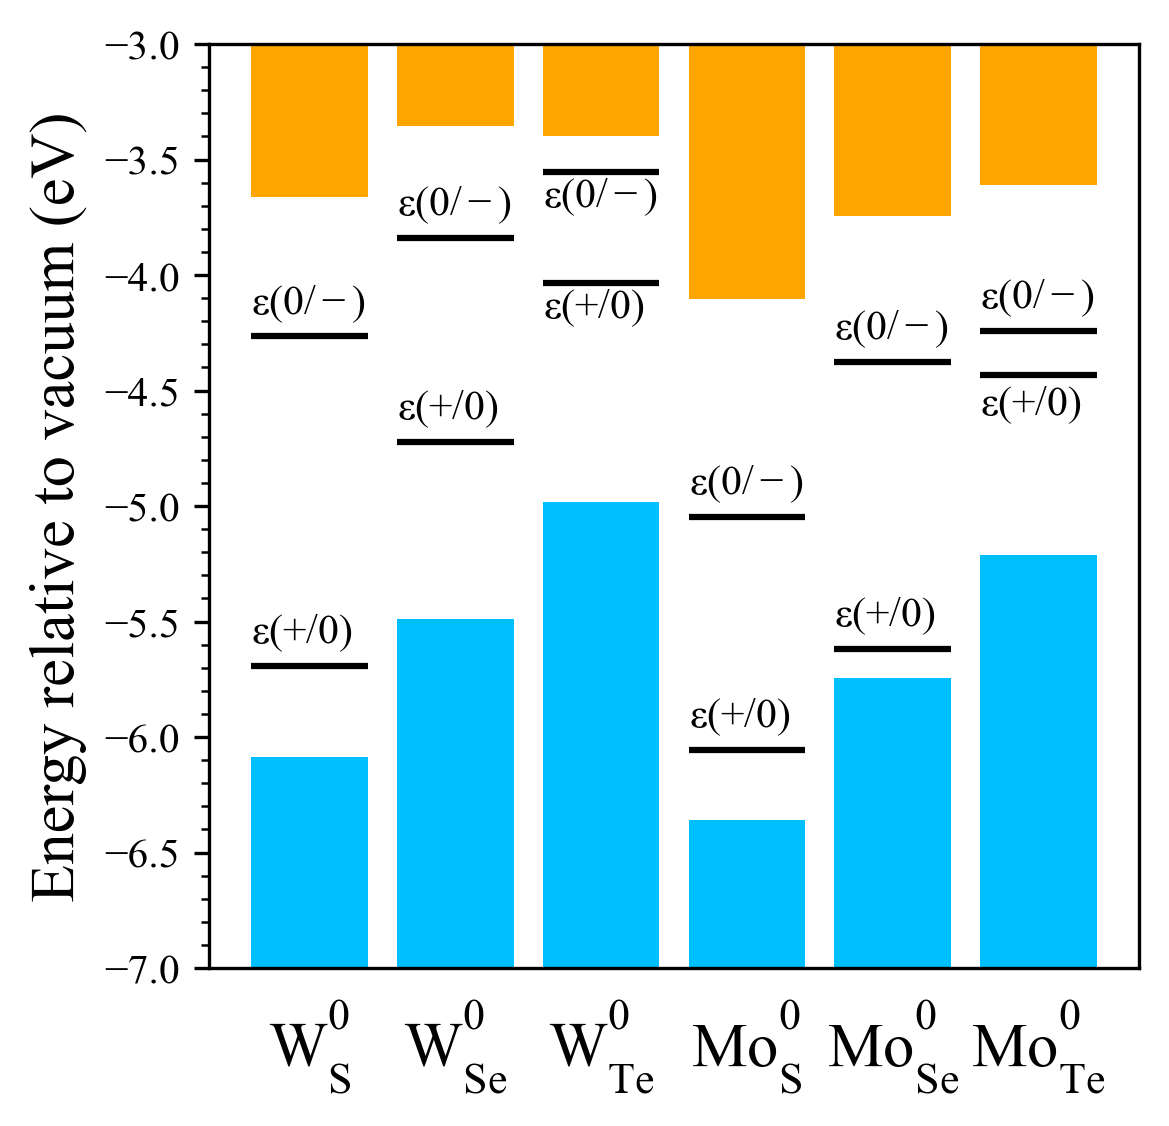

In [463]:
def transistion_levels(filter_label, tranl):
    colors = {
        "cbm": "orange",
        "vbm": "deepskyblue",
        "state": "black"
    }
    vbms_025 = []
    cbms_025 = []

    for taskid in filter_label:
        filters = {
            "task_id": taskid
        }
        e = get_db("single_photon_emitter", "pc").collection.find_one(filters)
        print(e["task_id"])
        vac = max(e["calcs_reversed"][0]["output"]["locpot"]["2"])
        cbms_025.append(e["output"]["cbm"] - vac)
        vbms_025.append(e["output"]["vbm"] - vac)
    cbms_025 = np.array(cbms_025)
    vbms_025 = np.array(vbms_025)

    bandgap = pd.DataFrame({"bandgap":dict(zip(filter_labels, cbms_025-vbms_025))})
    print(bandgap)
    x = np.arange(len(vbms_025))
    emin_025 = min(vbms_025)
    emin = emin_025-0.5


    fig = plt.figure(figsize=(4,4), dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    size = 10
    dx = 0.4
    for trls, pos, vbm in zip(tranl, x, np.array(vbms_025)):
        text = ["$\mathdefault{\epsilon(+/0)}$", "$\mathdefault{\epsilon(0/-)}$"]
        if pos == x[-1]:# for MoTe2
            ax.text(pos-dx, trls[0]+vbm-0.17, text[0], size=size)
            ax.text(pos-dx, trls[1]+vbm+0.1, text[1], size=size)
            ax.hlines(trls[0]+vbm, pos-0.4, pos+0.4, color=colors["state"])
            ax.hlines(trls[1]+vbm, pos-0.4, pos+0.4, color=colors["state"])
        elif pos == x[2]:
            ax.text(pos-dx, trls[0]+vbm-0.15, text[0], size=size)
            ax.text(pos-dx, trls[1]+vbm-0.15, text[1], size=size)
            ax.hlines(trls[0]+vbm, pos-0.4, pos+0.4, color=colors["state"])
            ax.hlines(trls[1]+vbm, pos-0.4, pos+0.4, color=colors["state"])
        else:
            ax.text(pos-dx, trls[0]+vbm+0.1, text[0], size=size)
            ax.text(pos-dx, trls[1]+vbm+0.1, text[1], size=size)
            ax.hlines(trls[0]+vbm, pos-0.4, pos+0.4, color=colors["state"])
            ax.hlines(trls[1]+vbm, pos-0.4, pos+0.4, color=colors["state"])
            # ax.text(pos-0.35, trl+vbm+0.1, text + " {:.2f}".format(trl+vbm))

    # plot bars
    # ax.bar(x, np.array(vbms_c2db) - emin, bottom=emin, label="vbm_c2db")
    ax.bar(x, np.array(vbms_025)--7, bottom=-7, label="vbm", color=colors["vbm"])
    ax.bar(x, -np.array(cbms_025), bottom=cbms_025, label="cbm", color=colors["cbm"])
    # ax.bar(x, -np.array(cbms_c2db), bottom=cbms_c2db, label="cbm_c2db")


    ax.set_ylim(-7, -3)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(10)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    # ax.set_xticks(x)
    # ax.set_xticklabels(labels_in_plot, rotation=0, fontsize=10)

    ax.set_xticks(range(0, 6, 1))
    ax.set_xticklabels(["$\mathdefault{W_{S}^0}$", 
                        "$\mathdefault{W_{Se}^0}$",
                        "$\mathdefault{W_{Te}^0}$",
                        "$\mathdefault{Mo_{S}^0}$",
                        "$\mathdefault{Mo_{Se}^0}$",
                        "$\mathdefault{Mo_{Te}^0}$"
                       ], fontdict={"fontsize": 15})
    ax.tick_params(axis="x", bottom=False)
    ax.set_ylabel("Energy relative to vacuum (eV)", fontname=FONT_STYLE, fontsize=15)
    


    display(fig)


# filter_labels = ["S-W", "Se-W", "Te-W", "Mo-S", "Mo-Se", "Mo-Te"]
filter_labels = [591, 625, 630, 611, 610, 631]
# labels_in_plot = ["${W_{S}}^0$", "${W_{Se}}^0$", "${Mo_{S}}^0$", "${Mo_{Se}}^0$"]
trls = [[2.4945-2.1, 1.82], [2.1977-1.43, 1.65], [1.6603-0.71, 1.43], [2.313-2.01, 1.31], [2.0595-1.93, 1.37], [1.6577-0.88, 0.97]]
transistion_levels(filter_labels, trls)

## Fig 1(c)

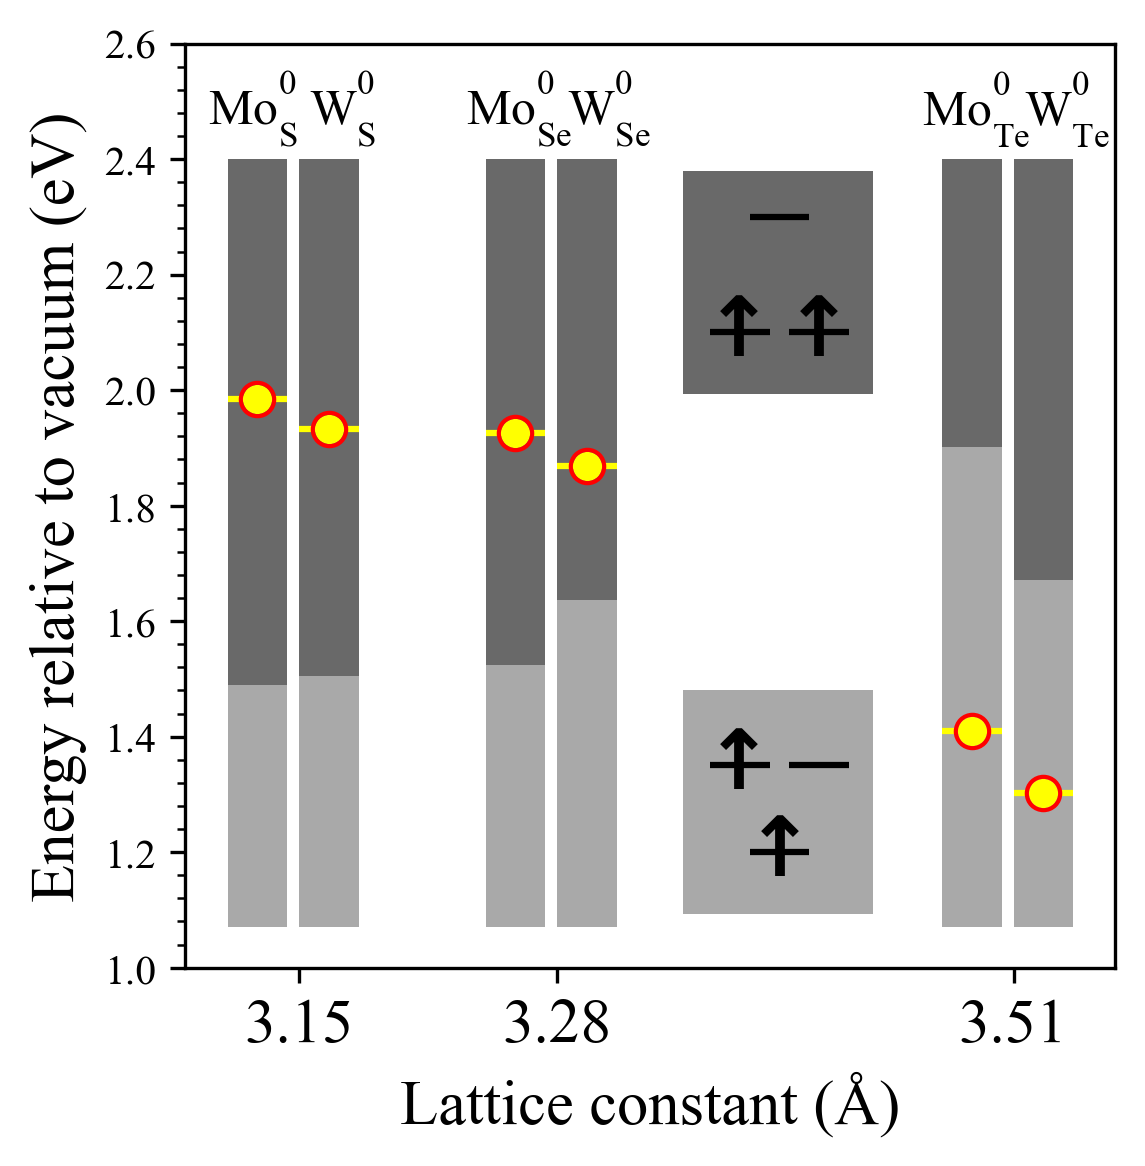

In [874]:
# colors = ["powderblue", "deepskyblue", "red", "orange"]
# colors = ["lightgreen", "limegreen", "red"]
colors = ["darkgray", "dimgray", "yellow", "red", "None"]

fig = plt.figure(figsize=(4,4), dpi=300)
ax = fig.add_subplot(1, 1, 1)

c = [3.15, 3.28, 3.51]
# c = [3.15, 3.28]

w = 0.03
maxy, miny = 2.4, 1.671-0.6

fontsize = 12

mos2 = [1.48, 1.58, 1.68, 1.78, 1.88, 1.98, 2.08, 2.18, 2.28, 2.38, 2.48]
ax.bar(c[0]-w/2*1.2,  miny-1.49, w, 1.49, color=colors[0], label="1-2 configuration")
ax.bar(c[0]-w/2*1.2, maxy-1.49, w, 1.49, color=colors[1], label="2-1 configuration")
ax.hlines(1.985, c[0]-w/2*1.2-w/2, c[0]-w/2*1.2+w/2, colors[2])
ax.plot(c[0]-w/2*1.2, 1.985, marker="o", color=colors[2])
ax.plot(c[0]-w/2*1.2, 1.985, marker="o", color=colors[3], fillstyle="none", markersize=8)


ax.hlines(1.49, c[0]-w/2*1.2-w/2, c[0]-w/2*1.2+w/2, colors[-1])
ax.text(c[0]-w/2*1.2-w/2-0.01, maxy+0.06, "$\mathdefault{Mo_{S}^0}$", fontsize=fontsize)
# ax.plot([c[0]-w/2*1.2, c[0]+w/2*1.2], [0.8, 1.49-0.4], color="silver", linestyle="dashed")

ws2 = [1.405, 1.505, 1.605, 1.705, 1.805, 1.905, 2.005, 2.105, 2.205, 2.305, 2.405]
ax.bar(c[0]+w/2*1.2, miny-1.505, w, 1.505, color=colors[0])
ax.bar(c[0]+w/2*1.2, maxy-1.505, w, 1.505, color=colors[1])
ax.hlines(1.932, c[0]+w/2*1.2-w/2, c[0]+w/2*1.2+w/2, colors[2])
ax.plot(c[0]+w/2*1.2, 1.932, marker="o", color=colors[2])
ax.plot(c[0]+w/2*1.2, 1.932, marker="o", color=colors[3], fillstyle="none", markersize=8)

ax.set


ax.hlines(1.505, c[0]+w/2*1.2-w/2, c[0]+w/2*1.2+w/2, colors[-1])
ax.text(c[0]+w/2*1.2-w/2+5e-3, maxy+0.06, "$\mathdefault{W_{S}^0}$", fontsize=fontsize)


# ax.plot([1.125, x2], [0.8, 1.505-0.5], color="silver", linestyle="dashed")

# ax.plot([c[0]-w/2*1.2+w/2, c[0]+w/2*1.2-w/2], [1.98, 1.905], color="black", linestyle="dashed")
# ax.plot([c[0]+w/2*1.2+w/2, c[1]-w/2*1.2-w/2], [1.905, 1.924], color="black", linestyle="dashed")
# ax.plot([c[0]-w/2*1.2+w/2, c[0]+w/2*1.2-w/2], [1.49, 1.505], color="black", linestyle="dashed")
# ax.plot([c[0]+w/2*1.2+w/2, c[1]-w/2*1.2-w/2], [1.505, 1.524], color="black", linestyle="dashed")

mose2 = [1.424, 1.524, 1.624, 1.724, 1.824, 1.924, 2.024, 2.124, 2.224, 2.324, 2.424]
ax.bar(c[1]-w/2*1.2, miny-1.524, w, 1.524, color=colors[0])
ax.bar(c[1]-w/2*1.2, maxy-1.524, w, 1.524, color=colors[1])
ax.hlines(1.926, c[1]-w/2*1.2-w/2, c[1]-w/2*1.2+w/2, colors[2])
ax.plot(c[1]-w/2*1.2, 1.926, marker="o", color=colors[2])
ax.plot(c[1]-w/2*1.2, 1.926, marker="o", color=colors[3], fillstyle="none", markersize=8)



ax.hlines(1.524, c[1]-w/2*1.2-w/2, c[1]-w/2*1.2+w/2, colors[-1])
ax.text(c[1]-w/2*1.2-w/2-0.01, maxy+0.06, "$\mathdefault{Mo_{Se}^0}$", fontsize=fontsize)


# ax.plot([x1+0.1, x1], [0.8, 1.49-0.4], color="silver", linestyle="dashed")

wse2 = [1.336, 1.436, 1.536, 1.636, 1.736, 1.836, 1.936, 2.036, 2.136, 2.236, 2.336]
ax.bar(c[1]+w/2*1.2, miny-1.636, w, 1.636, color=colors[0])
ax.bar(c[1]+w/2*1.2, maxy-1.636, w, 1.636, color=colors[1])
ax.hlines(1.868, c[1]+w/2*1.2-w/2, c[1]+w/2*1.2+w/2, colors[2])
ax.plot(c[1]+w/2*1.2, 1.868, marker="o", color=colors[2])
ax.plot(c[1]+w/2*1.2, 1.868, marker="o", color=colors[3], fillstyle="none", markersize=8)

ax.hlines(1.636, c[1]+w/2*1.2-w/2, c[1]+w/2*1.2+w/2, colors[-1])
ax.text(c[1]+w/2*1.2-w/2+5e-3, maxy+0.06, "$\mathdefault{W_{Se}^0}$", fontsize=fontsize)

# ax.plot([1.125, x2], [0.8, 1.505-0.5], color="silver", linestyle="dashed")

# ax.plot([c[1]-w/2*1.2+w/2, c[1]+w/2*1.2-w/2], [1.924, 1.836], color="black", linestyle="dashed")
# ax.plot([c[1]+w/2*1.2+w/2, c[2]-w/2*1.2-w/2], [1.836, 1.402], color="black", linestyle="dashed")
# ax.plot([c[1]-w/2*1.2+w/2, c[1]+w/2*1.2-w/2], [1.524, 1.636], color="black", linestyle="dashed")
# ax.plot([c[1]+w/2*1.2+w/2, c[2]-w/2*1.2-w/2], [1.636, 1.902], color="black", linestyle="dashed")

mote2 = [1.402, 1.502, 1.602, 1.702, 1.802, 1.902]
ax.bar(c[2]-w/2*1.2, miny-1.902, w, 1.902, color=colors[0])
ax.bar(c[2]-w/2*1.2, maxy-1.902, w, 1.902, color=colors[1])
ax.hlines(1.902, c[2]-w/2*1.2-w/2, c[2]-w/2*1.2+w/2, colors[-1])
ax.hlines(1.409, c[2]-w/2*1.2-w/2, c[2]-w/2*1.2+w/2, colors[2])
ax.plot(c[2]-w/2*1.2, 1.409, marker="o", color=colors[2])
ax.plot(c[2]-w/2*1.2, 1.409, marker="o", color=colors[3], fillstyle="none", markersize=8)



ax.text(c[2]-w/2*1.2-w/2-0.01, maxy+0.06, "$\mathdefault{Mo_{Te}^0}$", fontsize=fontsize)

# ax.plot([2.625, x1], [0.8, 1.902-0.9], color="silver", linestyle="dashed")


wte2 = [1.271, 1.371, 1.471, 1.571, 1.671, 1.771]
ax.bar(c[2]+w/2*1.2, miny-1.671, w, 1.671, color=colors[0])
ax.bar(c[2]+w/2*1.2, maxy-1.671, w, 1.671, color=colors[1])

ax.hlines(1.671, c[2]+w/2*1.2-w/2, c[2]+w/2*1.2+w/2, colors[-1])
ax.hlines(1.302, c[2]+w/2*1.2-w/2, c[2]+w/2*1.2+w/2, colors[2])
ax.plot(c[2]+w/2*1.2, 1.302, marker="o", color=colors[2])
ax.plot(c[2]+w/2*1.2, 1.302, marker="o", color=colors[3], fillstyle="none", markersize=8)



ax.text(c[2]+w/2*1.2-w/2+5e-3, maxy+0.06, "$\mathdefault{W_{Te}^0}$", fontsize=fontsize)


ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim([1, 2.6])


ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=15)
ax.set_xlabel("Lattice constant (Å)", fontsize=15)

# for tick in ax.get_yticklabels():
#     tick.set_fontname(FONT_STYLE)

ax.set_xticks([c[i]+w/2*1.2-0.015 for i in range(3)])
ax.set_xticklabels(c, fontdict={"fontsize": 15})
    

ax.text(3.355, 2.1, "   ", bbox=dict(facecolor=colors[1], edgecolor="none"), zorder=1, fontsize=50)
ax.text(3.355, 1.2, "   ", bbox=dict(facecolor=colors[0], edgecolor="none"), zorder=1, fontsize=50)

ax.hlines(2.1, 3.35+0.01, 3.38+0.01, zorder=2, colors="black")
ax.hlines(2.1, 3.39+0.01, 3.42+0.01, zorder=2, colors="black")
ax.text(3.35-0.002, 2.1-0.04, r"$\bf{\uparrow}$", zorder=3, fontsize=20)
ax.text(3.39-0.002, 2.1-0.04, r"$\bf{\uparrow}$", zorder=3, fontsize=20)
ax.hlines(2.3, 3.39-0.01, 3.42-0.01, zorder=2, colors="black")

ax.hlines(1.35, 3.35+0.01, 3.38+0.01, zorder=2, colors="black")
ax.hlines(1.35, 3.39+0.01, 3.42+0.01, zorder=2, colors="black")
ax.text(3.35-0.002, 1.35-0.04, r"$\bf{\uparrow}$", zorder=3, fontsize=20)
ax.hlines(1.2, 3.39-0.01, 3.42-0.01, zorder=2, colors="black")
ax.text(3.39-0.0215, 1.2-0.04, r"$\bf{\uparrow}$", zorder=3, fontsize=20)


    
# ax.legend()

# fig.savefig('/Users/jeng-yuantsai/Research/project/qubit/plt/in_paper/fig_1_c.eps', format="eps")
display(fig)


## Fig 2(b)

In [907]:
ws2 = {"d_taskid": 640, "host_taskid": 591, "label": r"$\mathdefault{W_S^0}$"}
levels = get_defect_state(ws2["d_taskid"], ws2["host_taskid"], defect_col="standard_defect", host_col="pc")

---task_id: 640---
total_mag:2.000
cbm:-0.197, vbm:-2.622, efermi:-2.491
{'1': {-0.665: False, -2.024: True}, '-1': {}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
330         0.0000  0.0000  0.0000  0.0322    1       s    0.0000    0.0322
330         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
330         0.0076  0.0076  0.0076  0.4126    1     dz2    0.0228    0.4126
330         0.0000  0.0018  0.0000  0.0000    1     dyz    0.0018    0.0000
330         0.0014  0.0000  0.0014  0.0000    1     dxz    0.0028    0.0000
330         0.0000  0.0000  0.0000  0.0000    1     dxy    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1  dx2-y2    0.0000    0.0000
329         0.0000  0.0000  0.0000  0.0000  

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11014 missing from current font.



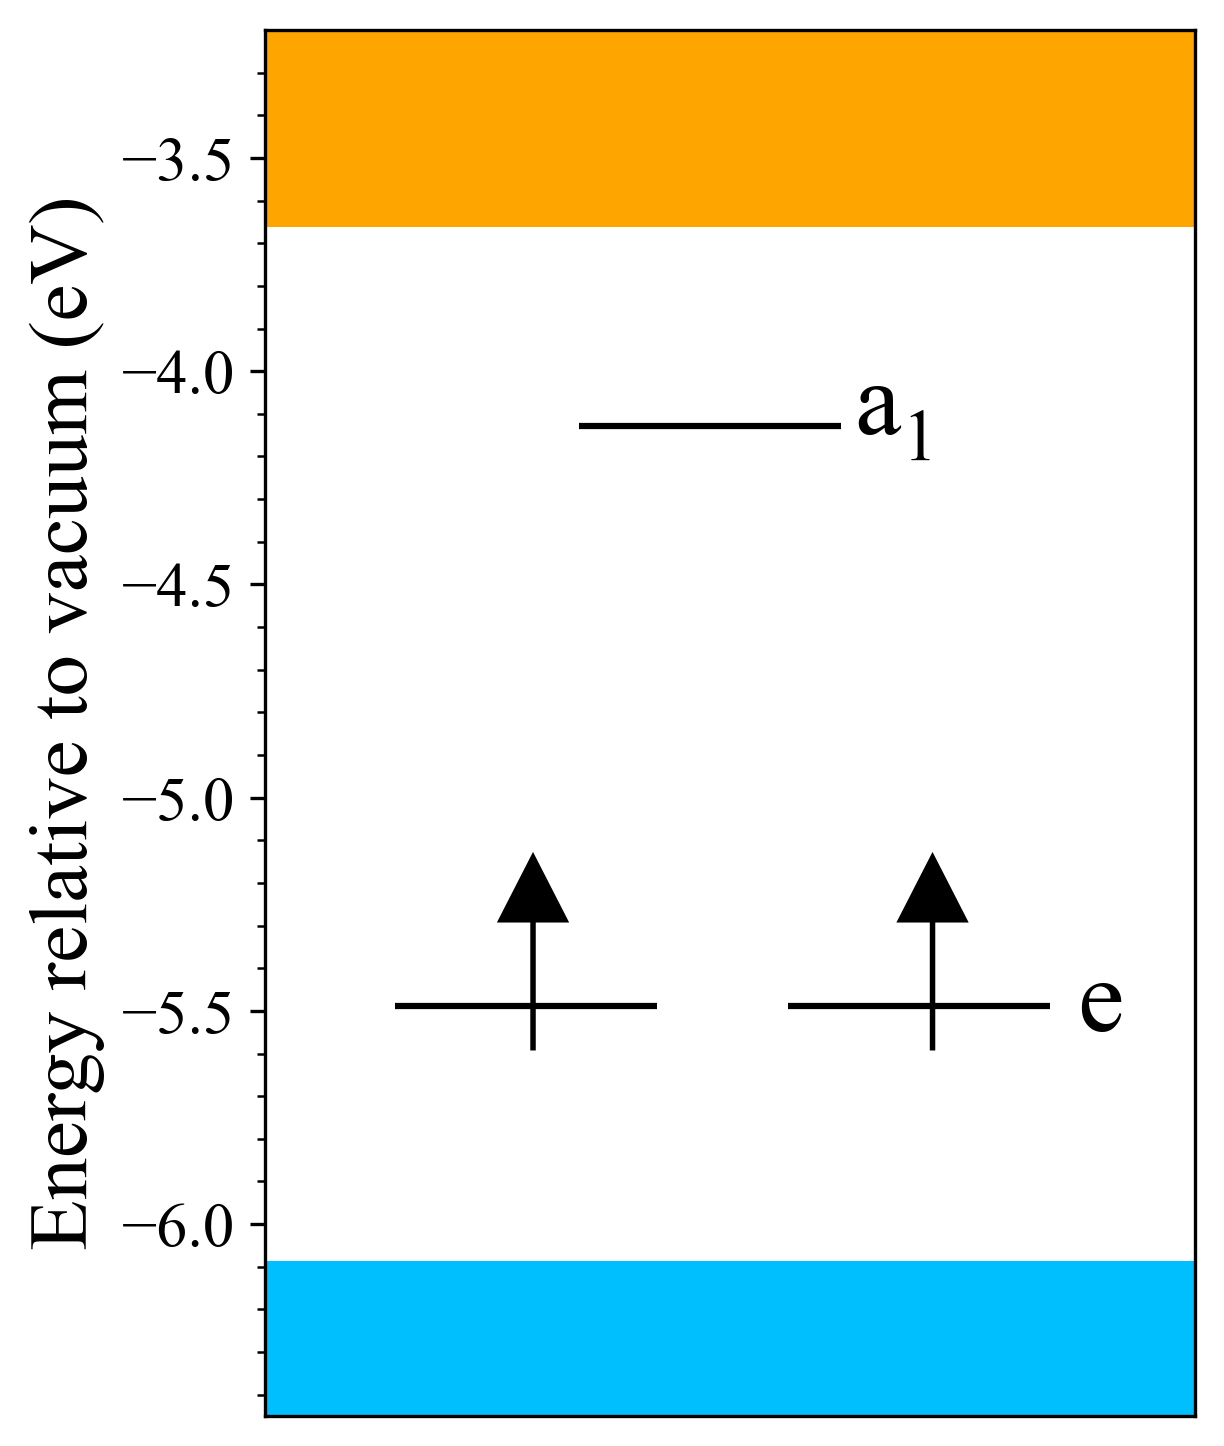

In [922]:
fig, ax = plt.subplots(figsize=(4,6), dpi=300)
x = 0
cbm, vbm = levels["cbm"], levels["vbm"]
for edge in [cbm, vbm]:
    ax.bar(x, vbm--6.5, 1, -6.5, color="deepskyblue")
    ax.bar(x, -3.2-cbm, 1, cbm, color="orange")

dx = 0.1
ax.hlines(list(levels["1"].keys())[1], x-0.3, x-0.1, colors="black")
ax.hlines(list(levels["1"].keys())[1], x+0.1-dx, x+0.3-dx, colors="black")

ax.arrow(x-0.195, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")

ax.arrow(x+0.21-dx, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")

ax.text(x+0.32-dx, list(levels["1"].keys())[1]-0.06, r"$\mathdefault{e}$", fontsize=25)


ax.hlines(list(levels["1"].keys())[0], x-0.1-0.06, x+0.1-0.06, colors="black")
ax.text(x+0.15-dx, list(levels["1"].keys())[0]-0.02, r"$\mathdefault{a_1}$", fontsize=25)

for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
ax.set_xlim(-0.4,0.31)
ax.set_ylim(-6.45, -3.2)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis="x", bottom=False, labelbottom=False)

ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=20)
display(fig)

# SI

## Fig S9

In [1002]:
ws2 = {"d_taskid": 645, "host_taskid": 593, "label": r"$\mathdefault{W_S^0}$", "vbm_dx":-0.05, "cbm_dx": 0}
wse2 = {"d_taskid": 647, "host_taskid": 594,  "label": r"$\mathdefault{W_{Se}^0}$", 
        "vbm_dx":-0.05, "cbm_dx": 0}
wte2 = {"d_taskid": 637, "host_taskid": 635,  "label": r"$\mathdefault{W_{Te}^0}$", 
        "vbm_dx":-0.3, "cbm_dx": -0.12}

mos2 = {"d_taskid": 646, "host_taskid": 613, "label": r"$\mathdefault{Mo_{S}^0}$",  "vbm_dx":-0.05, "cbm_dx": 0}
mose2 = {"d_taskid": 633, "host_taskid": 615, "label": r"$\mathdefault{Mo_{Se}^0}$",  "vbm_dx":-0.05, "cbm_dx": 0}
mote2 = {"d_taskid": 659, "host_taskid": 634, "label": r"$\mathdefault{Mo_{Te}^0}$",
         "vbm_dx":-0.185, "cbm_dx": -0.12}


defect_levels = []
for defect in [ws2, wse2, wte2, mos2, mose2, mote2]:
    print(defect["d_taskid"], defect["host_taskid"])
    levels = get_defect_state(defect["d_taskid"], defect["host_taskid"], "soc_standard_defect", "soc_pc",
                              defect["vbm_dx"], defect["cbm_dx"])
    defect_levels.append({"cbm": levels["cbm"], "vbm": levels["vbm"], "up": levels["1"], "dn": levels["-1"]})
    print(list(levels["1"].keys())[1] - list(levels["1"].keys())[2])

645 593
---task_id: 645---
total_mag:0.000
cbm:-0.261, vbm:-2.368, efermi:-1.563
{'1': {-0.684: False, -1.79: True, -2.164: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0289    1       s    0.0000    0.0289
658         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0076  0.0076  0.0076  0.3893    1     dz2    0.0228    0.3893
658         0.0011  0.0045  0.0011  0.0000    1     dyz    0.0067    0.0000
658         0.0034  0.0000  0.0034  0.0000    1     dxz    0.0068    0.0000
658         0.0020  0.0015  0.0020  0.0000    1     dxy    0.0055    0.0000
658         0.0017  0.0022  0.0017  0.0000    1  dx2-y2    0.0056    0.0000
657         0.0000  0.0000  0.000

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



0.37400000000000055
647 594
---task_id: 647---
total_mag:0.000
cbm:-0.257, vbm:-2.022, efermi:-1.301
{'1': {-0.613: False, -1.528: True, -1.871: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0205    1       s    0.0000    0.0205
658         0.0000  0.0000  0.0000  0.0012    1      pz    0.0000    0.0012
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0031  0.0031  0.0031  0.3399    1     dz2    0.0093    0.3399
658         0.0016  0.0064  0.0016  0.0000    1     dyz    0.0096    0.0000
658         0.0048  0.0000  0.0048  0.0000    1     dxz    0.0096    0.0000
658         0.0020  0.0014  0.0020  0.0000    1     dxy    0.0054    0.0000
658         0.0016  0.0022  0.0016  0.0000    1  dx2-y2    0.0054    0.0000
657         

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



---task_id: 637---
total_mag:0.000
cbm:0.269, vbm:-0.889, efermi:-0.201
{'1': {0.12: False, -0.426: True, -1.091: True}}
                54      49      55      74 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0000    1       s    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0020  0.0063  0.0062  0.0020    1     dz2    0.0145    0.0020
658         0.0000  0.0000  0.0000  0.0572    1     dyz    0.0000    0.0572
658         0.0000  0.0000  0.0000  0.0283    1     dxz    0.0000    0.0283
658         0.0011  0.0000  0.0020  0.0323    1     dxy    0.0031    0.0323
658         0.0021  0.0020  0.0000  0.0678    1  dx2-y2    0.0041    0.0678
657         0.0000  0.0000  0.0000  0.0000 

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



---task_id: 646---
total_mag:0.000
cbm:-0.568, vbm:-2.701, efermi:-2.310
{'1': {-1.011: False, -2.538: True, -2.652: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0201    1       s    0.0000    0.0201
658         0.0000  0.0000  0.0000  0.0027    1      pz    0.0000    0.0027
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0155  0.0154  0.0154  0.4841    1     dz2    0.0463    0.4841
658         0.0032  0.0126  0.0032  0.0000    1     dyz    0.0190    0.0000
658         0.0095  0.0000  0.0095  0.0000    1     dxz    0.0190    0.0000
658         0.0050  0.0000  0.0050  0.0000    1     dxy    0.0100    0.0000
658         0.0019  0.0066  0.0019  0.0000    1  dx2-y2    0.0104    0.0000
657         0.0000  0.0000  0.0000  0.00

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



0.11399999999999988
633 615
---task_id: 633---
total_mag:0.000
cbm:-0.528, vbm:-2.358, efermi:-2.037
{'1': {-0.902: False, -2.267: True, -2.385: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0174    1       s    0.0000    0.0174
658         0.0000  0.0000  0.0000  0.0032    1      pz    0.0000    0.0032
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0121  0.0121  0.0121  0.4641    1     dz2    0.0363    0.4641
658         0.0031  0.0124  0.0031  0.0000    1     dyz    0.0186    0.0000
658         0.0093  0.0000  0.0093  0.0000    1     dxz    0.0186    0.0000
658         0.0035  0.0000  0.0035  0.0000    1     dxy    0.0070    0.0000
658         0.0014  0.0046  0.0014  0.0000    1  dx2-y2    0.0074    0.0000
657         

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



0.11799999999999944
659 634
---task_id: 659---
total_mag:0.000
cbm:0.181, vbm:-1.192, efermi:-0.641
{'1': {-0.184: False, -0.87: True, -1.374: True}}
                54      55      49      74 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0000    1       s    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
658         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
658         0.0000  0.0102  0.0101  0.0000    1     dz2    0.0203    0.0000
658         0.0000  0.0000  0.0000  0.0761    1     dyz    0.0000    0.0761
658         0.0000  0.0000  0.0000  0.0192    1     dxz    0.0000    0.0192
658         0.0000  0.0000  0.0000  0.0361    1     dxy    0.0000    0.0361
658         0.0000  0.0000  0.0000  0.1431    1  dx2-y2    0.0000    0.1431
657         0.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



0.5040000000000004


/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11014 missing from current font.



[ 0  2  4  6  8 10]


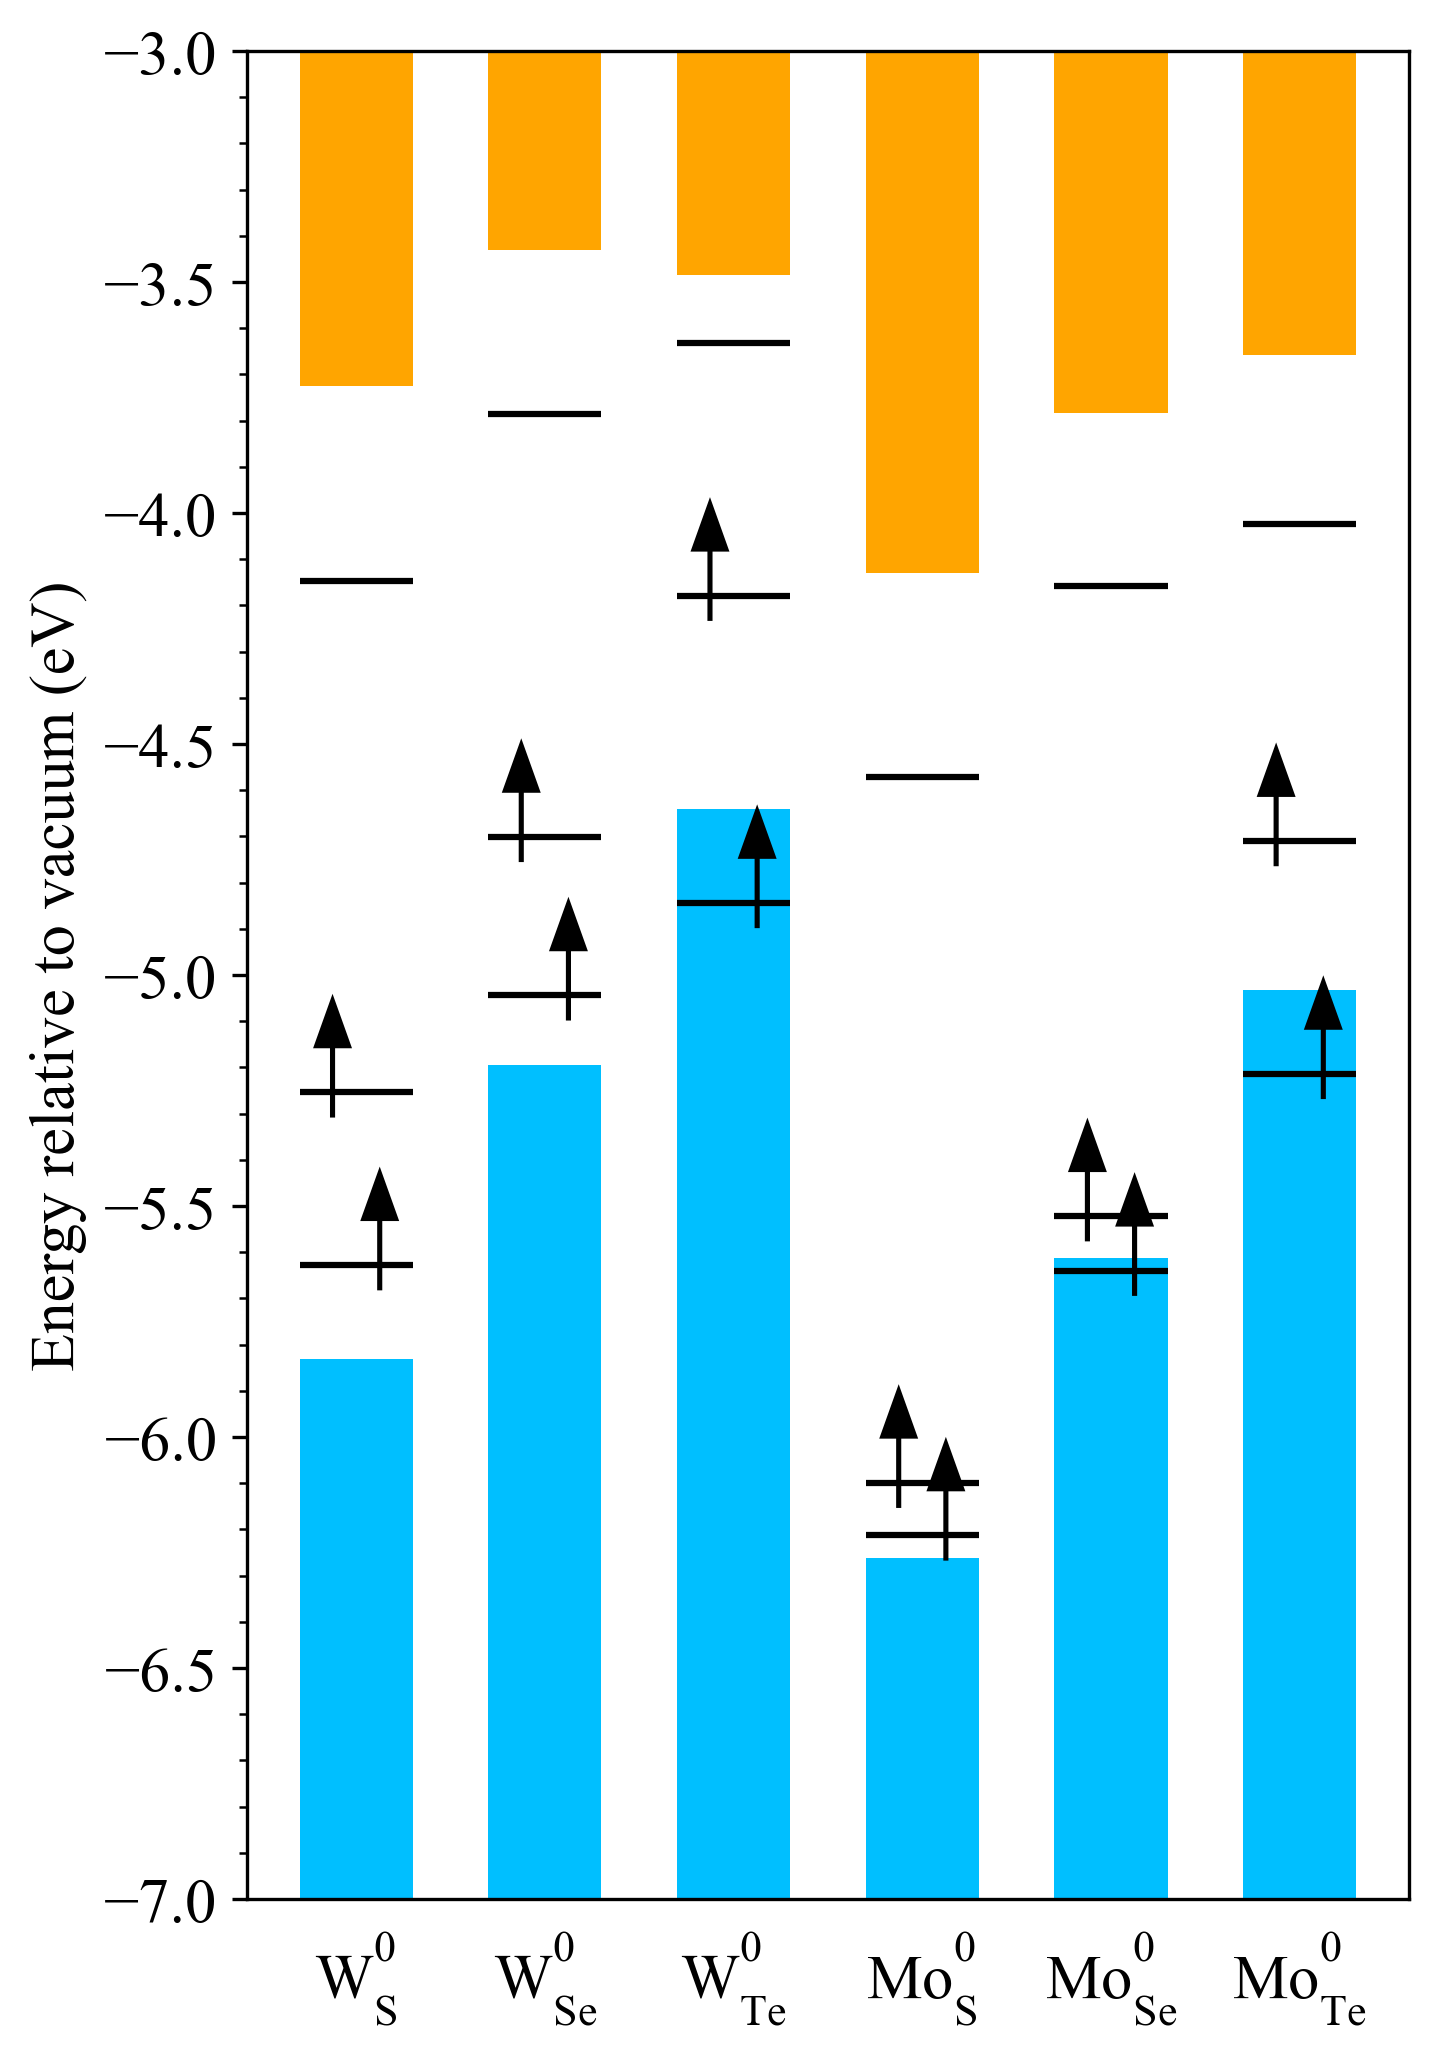

In [1019]:
fig, ax = plt.subplots(figsize=(5,8), dpi=300)
print(np.arange(0, len(defect_levels)*2, 2))
for defect, x in zip(defect_levels, np.arange(0, len(defect_levels)*2, 2)):
    cbm, vbm = defect["cbm"], defect["vbm"]
    for edge in [cbm, vbm]:
        ax.bar(x, vbm--7, 1.2, -7, color="deepskyblue")
        ax.bar(x, -3-cbm, 1.2, cbm, color="orange")
    
    dx = 0.35
    for level, occupied in defect["up"].items():
        # dx += 0.2
        ax.hlines(level, x-0.6, x+0.6, colors="black")
        if occupied:
#             ax.text(x-0.6+dx, level-0.05, r"$\bf{\uparrow}$", fontsize=28)
            ax.arrow(x-0.6+dx, level-0.05, dx=0, dy=0.15,
                     head_length=0.1, width=0.01, head_width=0.35, shape="full", color="black")
            dx += 0.5


ax.set_ylim(-7, -3)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
ax.set_xticks(np.arange(0, len(defect_levels)*2, 2))
ax.set_xticklabels([i["label"] for i in [ws2, wse2, wte2, mos2, mose2, mote2]], fontdict={"fontsize": 15})
ax.tick_params(axis="x", bottom=False)

ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=15)


    
#     ax.set_xlim(-0.5, 0.5)
display(fig)

## Fig S3

In [932]:
wse2 = {"d_taskid": 642, "host_taskid": 592, "label": r"$\mathdefault{W_{Se}^0}$"}

print(wse2["d_taskid"], wse2["host_taskid"])
levels = get_defect_state(wse2["d_taskid"], wse2["host_taskid"],  defect_col="standard_defect", host_col="pc")

642 592
---task_id: 642---
total_mag:2.000
cbm:-0.184, vbm:-2.317, efermi:-2.245
{'1': {-0.592: False, -1.739: True}, '-1': {}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
330         0.0000  0.0000  0.0000  0.0235    1       s    0.0000    0.0235
330         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1      py    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1      px    0.0000    0.0000
330         0.0030  0.0030  0.0030  0.3624    1     dz2    0.0090    0.3624
330         0.0000  0.0038  0.0000  0.0000    1     dyz    0.0038    0.0000
330         0.0028  0.0000  0.0028  0.0000    1     dxz    0.0056    0.0000
330         0.0000  0.0000  0.0000  0.0000    1     dxy    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0000    1  dx2-y2    0.0000    0.0000
329         0.0000  0.0000  0.0000  

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11014 missing from current font.



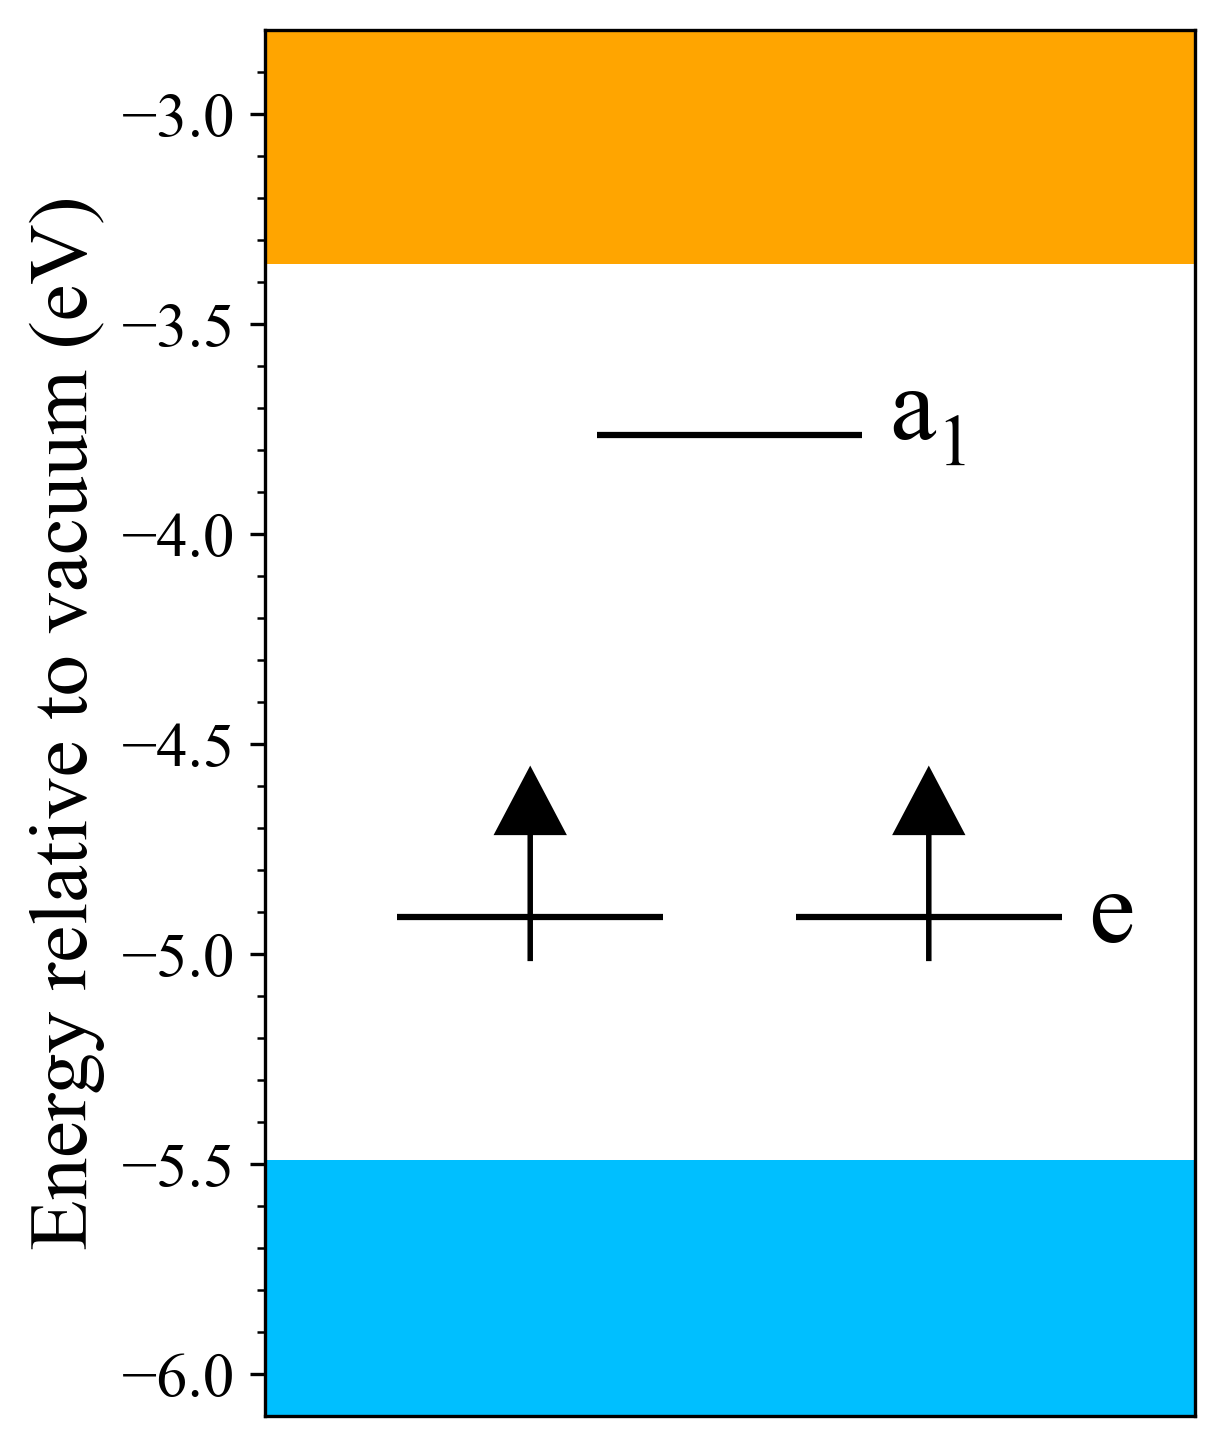

In [945]:
fig, ax = plt.subplots(figsize=(4,6), dpi=300)
x = 0
cbm, vbm = levels["cbm"], levels["vbm"]
for edge in [cbm, vbm]:
    ax.bar(x, vbm--6.1, 1, -6.1, color="deepskyblue")
    ax.bar(x, -2.8-cbm, 1, cbm, color="orange")

ax.hlines(list(levels["1"].keys())[1], x-0.3, x-0.1, colors="black")
ax.hlines(list(levels["1"].keys())[1], x+0.1-0.1, x+0.3-0.1, colors="black")

ax.arrow(x+0.1, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")
ax.arrow(x-0.2, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")

ax.text(x+0.32-0.1, list(levels["1"].keys())[1]-0.06, r"$\mathdefault{e}$", fontsize=25)


ax.hlines(list(levels["1"].keys())[0], x-0.1-0.05, x+0.1-0.05, colors="black")
ax.text(x+0.15-0.08, list(levels["1"].keys())[0]-0.01, r"$\mathdefault{a_1}$", fontsize=25)

for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
ax.set_xlim(-0.4,0.4-0.1)
ax.set_ylim(-6.1, -2.8)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis="x", bottom=False, labelbottom=False)

ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=20)
display(fig)

## Fig S5

In [947]:
ws2_ch = {"d_taskid": 809, "host_taskid": 591, "label": r"$\mathdefault{W_{S}^0}$"}

print(ws2_ch["d_taskid"], ws2_ch["host_taskid"])
levels = get_defect_state(ws2_ch["d_taskid"], ws2_ch["host_taskid"], defect_col="standard_defect", host_col="pc")

809 591
---task_id: 809---
total_mag:2.000
cbm:-0.200, vbm:-2.624, efermi:-2.345
{'1': {-0.57: False, -2.022: True, -2.115: True}, '-1': {-2.574: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
330         0.0000  0.0000  0.0000  0.0183    1       s    0.0000    0.0183
330         0.0000  0.0000  0.0000  0.0000    1      pz    0.0000    0.0000
330         0.0000  0.0000  0.0000  0.0010    1      py    0.0000    0.0010
330         0.0000  0.0000  0.0000  0.0028    1      px    0.0000    0.0028
330         0.0113  0.0038  0.0041  0.2974    1     dz2    0.0192    0.2974
330         0.0000  0.0029  0.0000  0.0034    1     dyz    0.0029    0.0034
330         0.0018  0.0000  0.0023  0.0127    1     dxz    0.0041    0.0127
330         0.0000  0.0000  0.0000  0.0668    1     dxy    0.0000    0.0668
330         0.0000  0.0000  0.0000  0.0338    1  dx2-y2    0.0000    0.0338
329        

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11015 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11015 missing from current font.



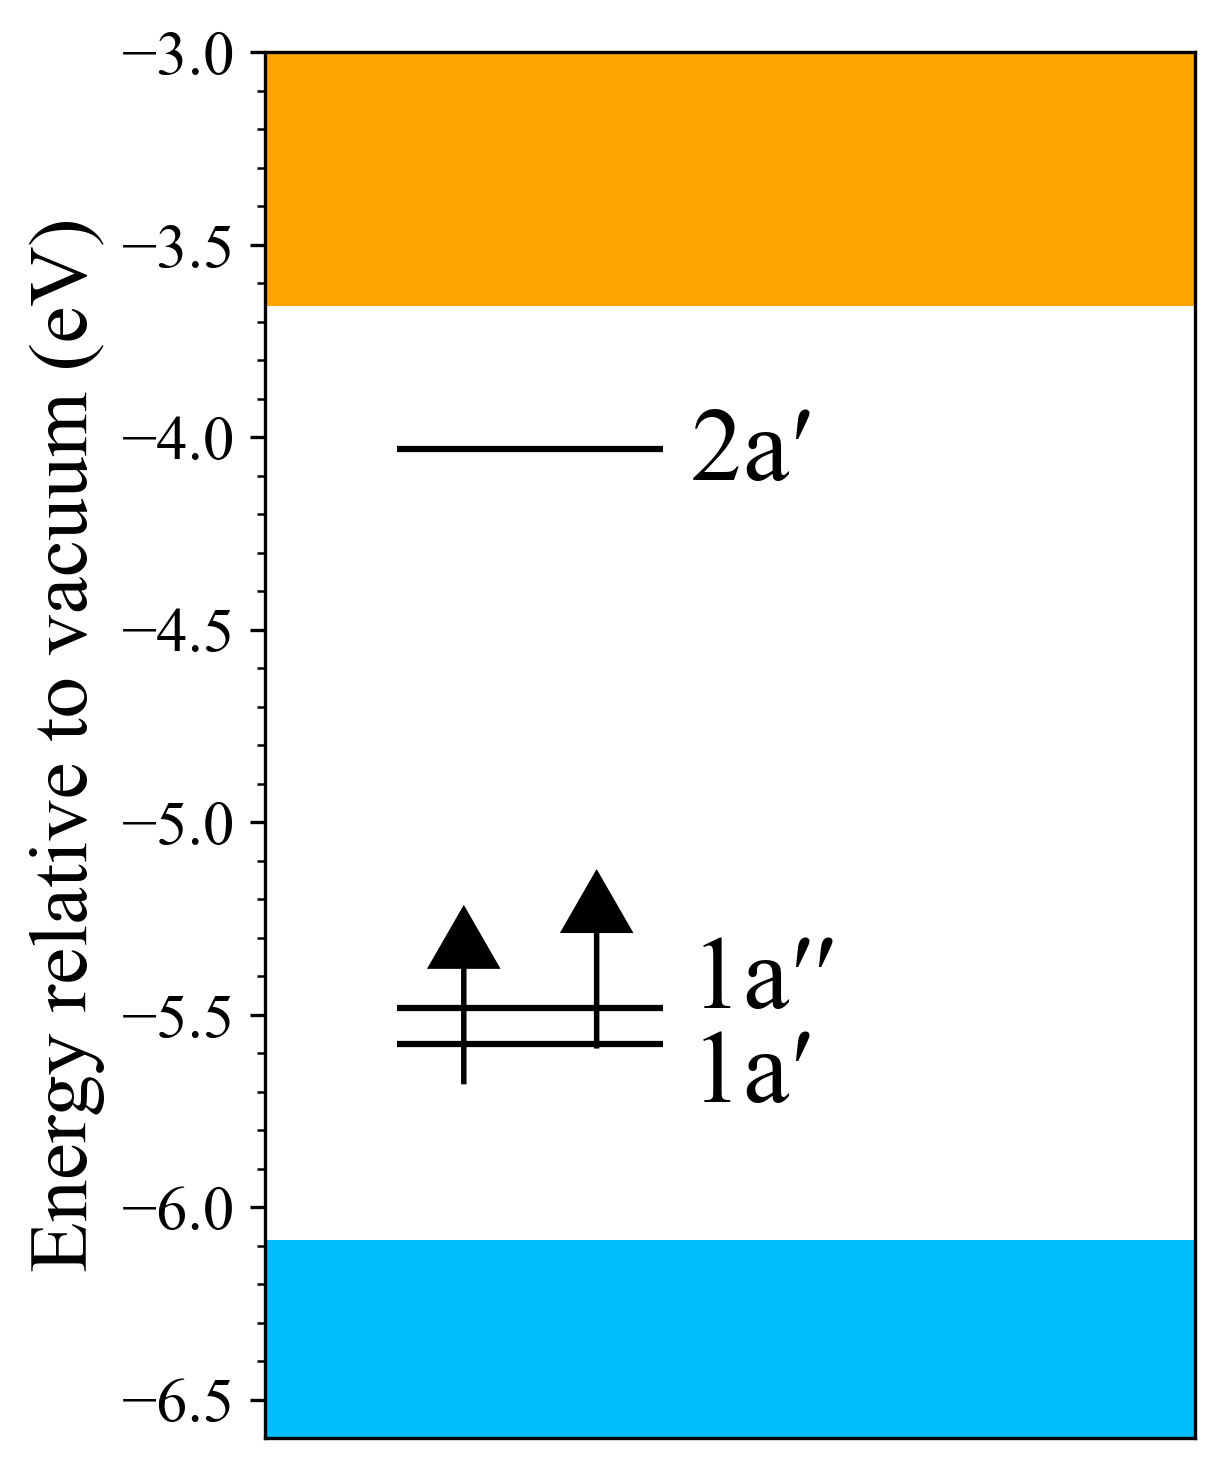

In [972]:
fig, ax = plt.subplots(figsize=(4,6), dpi=300)
x = 0
cbm, vbm = levels["cbm"], levels["vbm"]
for edge in [cbm, vbm]:
    ax.bar(x, vbm--7, 1, -7, color="deepskyblue")
    ax.bar(x, -2.8-cbm, 1, cbm, color="orange")

ax.hlines(list(levels["1"].keys())[1], x-0.1, x+0.1, colors="black")
ax.hlines(list(levels["1"].keys())[2], x-0.1, x+0.1, colors="black")
# ax.text(x/2-0.05, list(levels["1"].keys())[1]-0.1, r"$\bf{\uparrow}$", fontsize=50)
# ax.text(x/2-0.15, list(levels["1"].keys())[2]-0.1, r"$\bf{\uparrow}$", fontsize=50)

ax.arrow(x/2-0.05+0.1, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")
ax.arrow(x/2-0.15+0.1, list(levels["1"].keys())[2]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")

ax.text(x/2+0.12, list(levels["1"].keys())[1]+0, r"$\mathdefault{1a\prime\prime}$", fontsize=25)
ax.text(x/2+0.12, list(levels["1"].keys())[2]-0.15, r"$\mathdefault{1a\prime}$", fontsize=25)




ax.hlines(list(levels["1"].keys())[0], x-0.1, x+0.1, colors="black")
ax.text(x/2+0.12, list(levels["1"].keys())[0]-0.08, r"$\mathdefault{2a\prime}$", fontsize=25)

for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
ax.set_xlim(-0.2,0.5)
ax.set_ylim(-6.6, -3)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis="x", bottom=False, labelbottom=False)

ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=20)
display(fig)

In [1008]:
ws2_soc_ch = {"d_taskid": 812, "host_taskid": 593, "label": r"$\mathdefault{W_{S}^0}$"}

print(ws2_soc_ch["d_taskid"], ws2_soc_ch["host_taskid"])
levels = get_defect_state(ws2_soc_ch["d_taskid"], ws2_soc_ch["host_taskid"], "soc_standard_defect", "soc_pc")

812 593
---task_id: 812---
total_mag:0.000
cbm:-0.263, vbm:-2.370, efermi:-1.633
{'1': {-0.575: False, -1.864: True, -2.186: True}}
                 5       6       0      25 spin orbital  adjacent  antisite
band_index                                                                 
658         0.0000  0.0000  0.0000  0.0071    1       s    0.0000    0.0071
658         0.0000  0.0000  0.0000  0.0013    1      pz    0.0000    0.0013
658         0.0000  0.0000  0.0000  0.0012    1      py    0.0000    0.0012
658         0.0000  0.0000  0.0000  0.0031    1      px    0.0000    0.0031
658         0.0068  0.0021  0.0024  0.1683    1     dz2    0.0113    0.1683
658         0.0012  0.0037  0.0011  0.0048    1     dyz    0.0060    0.0048
658         0.0035  0.0000  0.0032  0.0088    1     dxz    0.0067    0.0088
658         0.0023  0.0011  0.0013  0.1143    1     dxy    0.0047    0.1143
658         0.0019  0.0010  0.0010  0.0858    1  dx2-y2    0.0039    0.0858
657         0.0000  0.0000  0.00

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/qubitPack/qc_searching/py_energy_diagram/application/defect_levels.py:30: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 11014 missing from current font.

/Users/jeng-yuantsai/anaconda3/envs/workflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 11014 missing from current font.



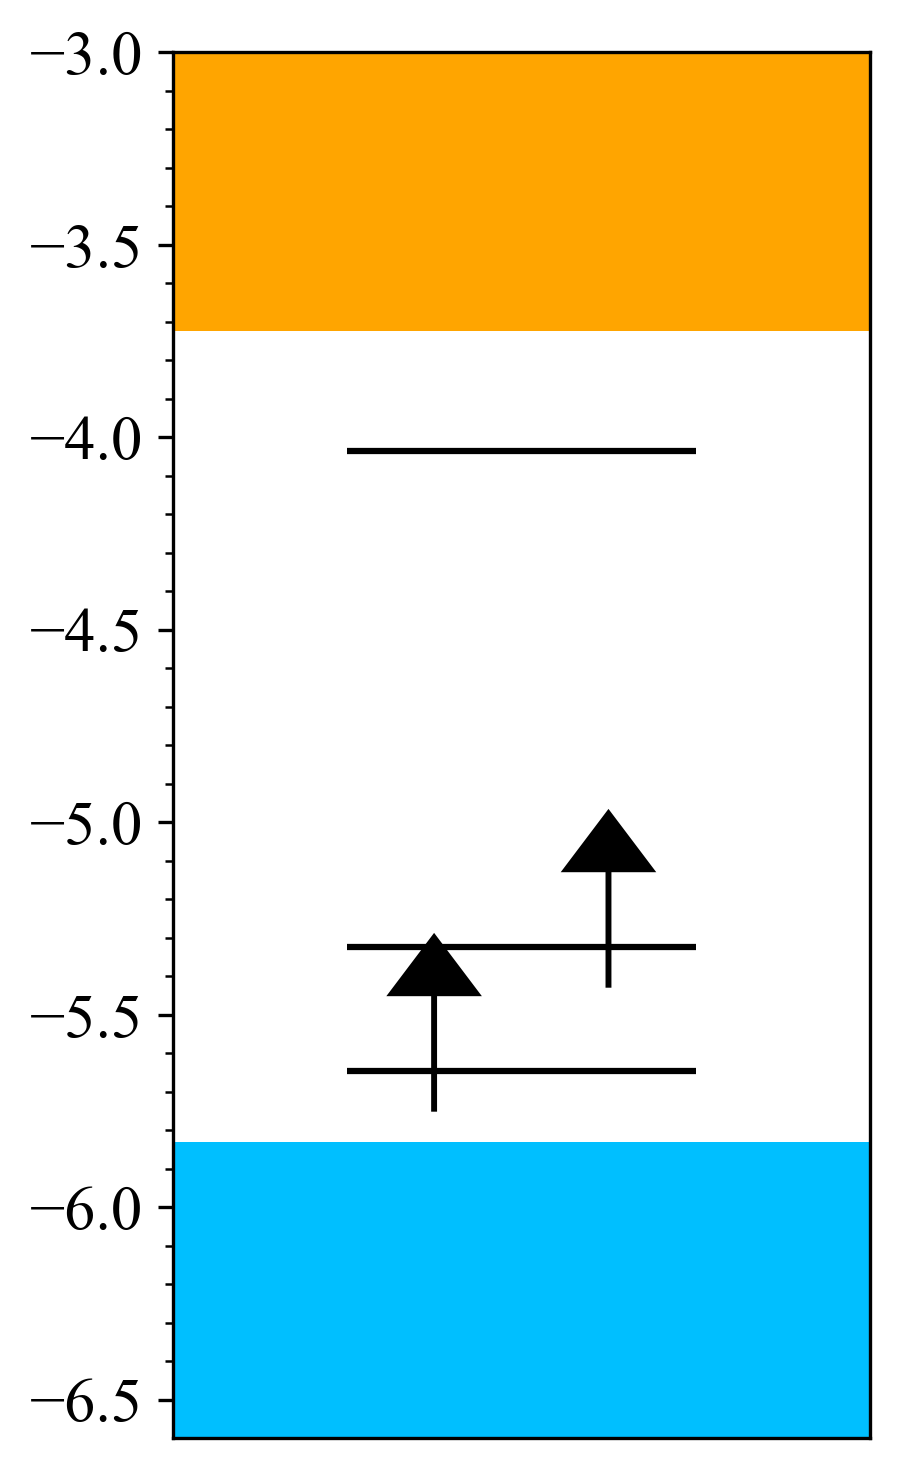

In [1017]:
fig, ax = plt.subplots(figsize=(3,6), dpi=300)
x = 0
cbm, vbm = levels["cbm"], levels["vbm"]
for edge in [cbm, vbm]:
    ax.bar(x, vbm--7, 1, -7, color="deepskyblue")
    ax.bar(x, -2.8-cbm, 1, cbm, color="orange")

ax.hlines(list(levels["1"].keys())[1], x-0.1, x+0.1, colors="black")
ax.hlines(list(levels["1"].keys())[2], x-0.1, x+0.1, colors="black")
# ax.text(x/2-0.05, list(levels["1"].keys())[1]-0.1, r"$\bf{\uparrow}$", fontsize=50)
# ax.text(x/2-0.09, list(levels["1"].keys())[2]-0.1, r"$\bf{\uparrow}$", fontsize=50)

ax.arrow(x/2+0.05, list(levels["1"].keys())[1]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")
ax.arrow(x/2-0.05, list(levels["1"].keys())[2]-0.1, dx=0, dy=0.3,
         head_length=0.15, width=0.001, head_width=0.05, shape="full", color="black")


# ax.text(x/2+0.12, list(levels["1"].keys())[1]+0.05, r"$\mathdefault{1a\prime}$", fontsize=25)
# ax.text(x/2+0.12, list(levels["1"].keys())[2]-0.15, r"$\mathdefault{1a\prime\prime}$", fontsize=25)



ax.hlines(list(levels["1"].keys())[0], x-0.1, x+0.1, colors="black")
# ax.text(x/2+0.12, list(levels["1"].keys())[0], r"$\mathdefault{2a\prime}$", fontsize=25)

for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
ax.set_xlim(-0.2,0.2)
ax.set_ylim(-6.6, -3)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis="x", bottom=False, labelbottom=False)

# ax.set_ylabel("Energy relative to vacuum (eV)", fontsize=20)
display(fig)